# ゼミ

    4月15日　太田　康之

## 報告内容
- amp_65のパターン抽出

    **井手・杉山,異常検知と変化検知,(2015) 部分空間法による変化検知**
    
    特徴的なパターンをどのように見出すかについて**特異値分解**による抽出（**特異スペクトル変換法**）が説明されていた。

<img src = "book_ijoukenchi_henkakenchi_s.png">

## アドバイス頂きたいこと

- パターン抽出の手法について

    - 特異スペクトル変換法
<img src ="fig_sindenzu_org.png">

<img src ="fig_sindenzu_treat.png">

    - 計算コストを要する

# 取り扱うデータについて 

- 題材として製品Nから製品Cに切替えをおこなった際の時系列データについて分析を行った

日付|製品|（DATA）|良品数|不良品数|製造中断時間|備考
-|-|-|-|-|-|-
200118|C|200119|1600|51|85min|他設備トラブル
200119|rest|200120|1160|17|105min|切替え
200120|N|200121|200|58|1260min|切替え、生産開始21:00～不良多い
200121|N|200122|1480|178|50min|洗浄（16:00～16:50）
200128|N|200129|940|324|360min|洗浄（16:00～22:00）
200129|N,C|200130|1260|233|200min|切替え（15:10～17:00）色抜き追加（18:00～19:40）
200130|C|200131|1760|54|10min|定例作業

In [2]:
#使用ライブラリ
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import time
import numpy as np
from numpy.linalg import svd #matrix_rank

#使用ディレクトリ
WORK_DIR = os.getcwd() #D:\yohta_share\gsds2019\project\remote
SAVE_DIR = WORK_DIR
DATA_DIR = 'D:\\yohta_share\\gsds2019\\project\\no7\\data_pickles'
CODE_DIR = 'D:\\yohta_share\\gsds2019\\project\\no7\\pycode'

In [3]:
#対象日
SELECT_DATE= [ '200119', '200120', '200121', '200122','200129', '200130', '200131']

os.chdir(DATA_DIR)

f = open("PKL_LIST.txt","rb")
PKL_LIST = pickle.load(f)

PKL = []
for i in range(len(PKL_LIST)):
    PKL += PKL_LIST[i]

DATE = {}
for i in range(len(SELECT_DATE)):
    DATE[i] = pd.read_pickle(SELECT_DATE[i] + '_65.pkl')

## 時系列表示 

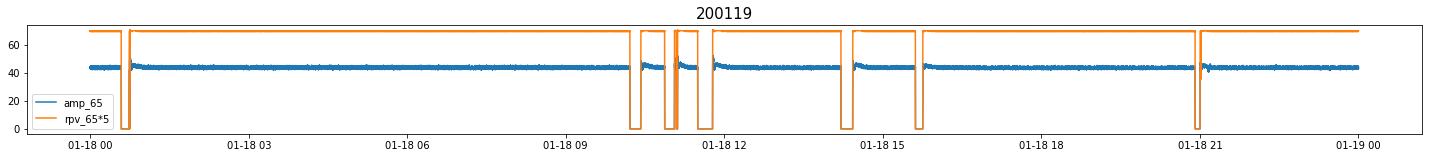

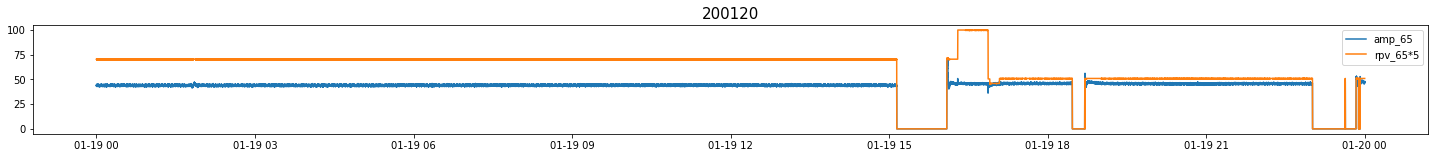

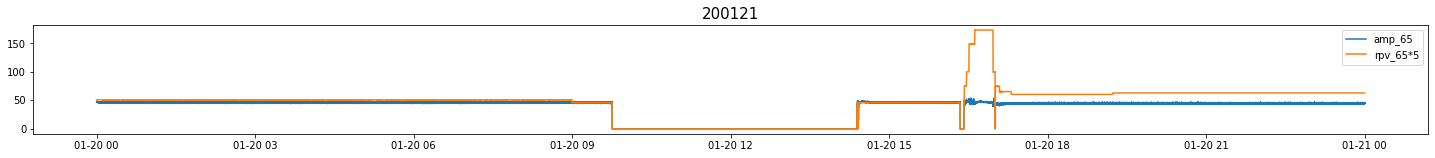

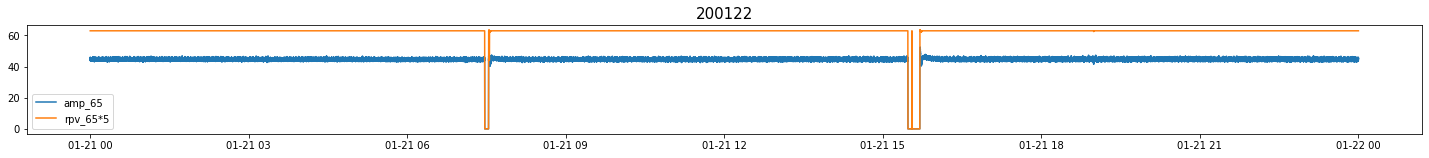

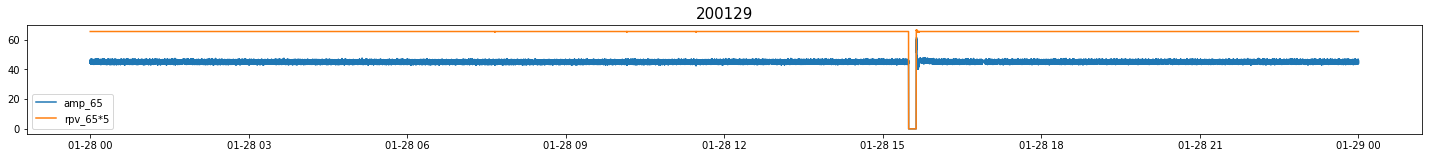

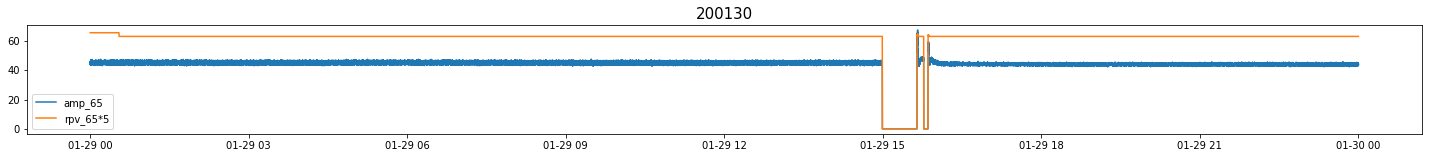

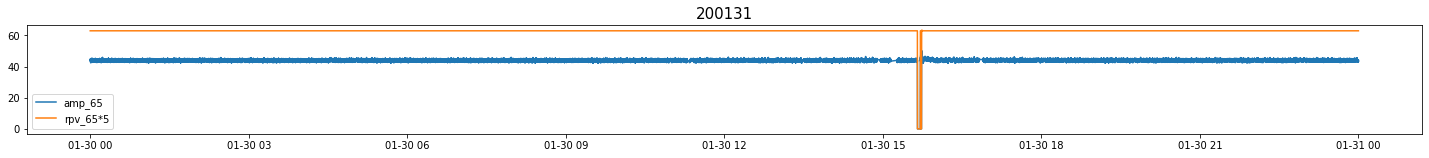

In [5]:
for i in range(len(DATE)):
    plt.figure(figsize = ([25,2]))
    plt.plot(DATE[i]['time'],DATE[i]['amp_65'], label = 'amp_65')
    plt.plot(DATE[i]['time'],DATE[i]['rpv_65']*5, label = 'rpv_65*5')
    plt.title(SELECT_DATE[i], fontsize= 15)
    plt.legend()
plt.show();

## rpv_65 ヒストグラム表示 

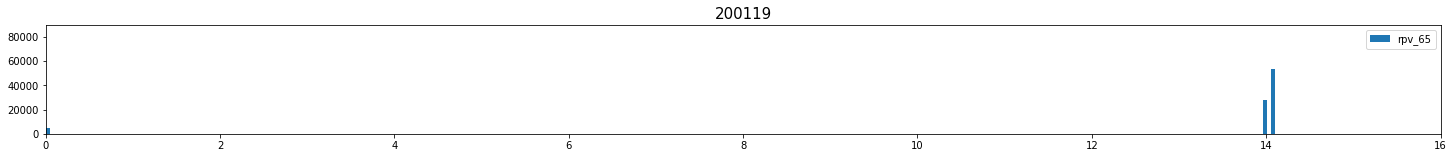

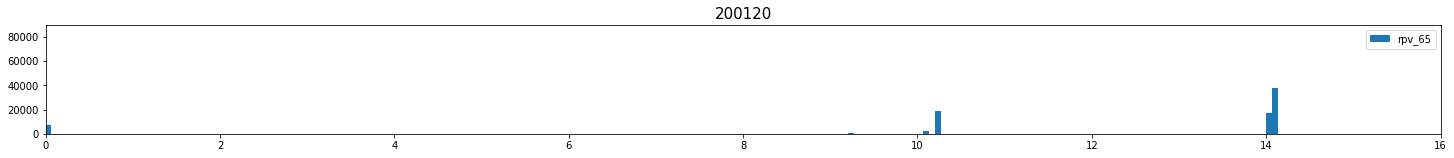

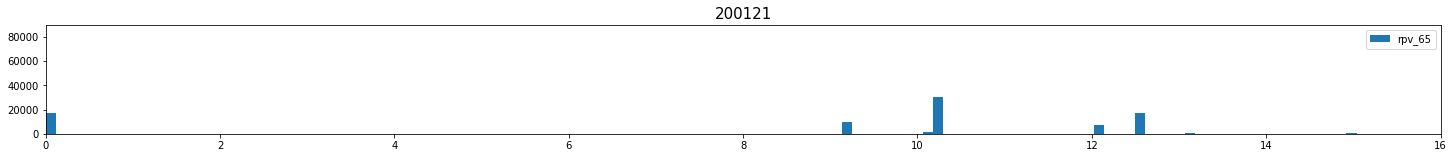

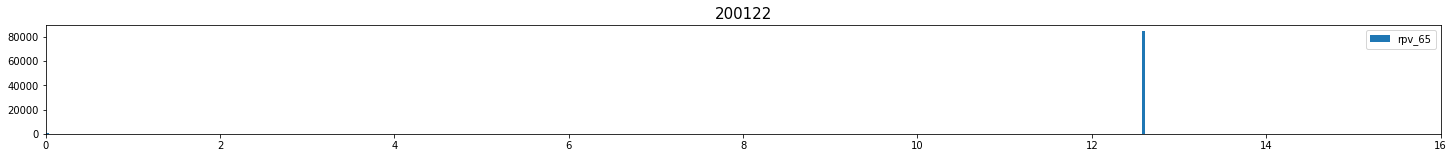

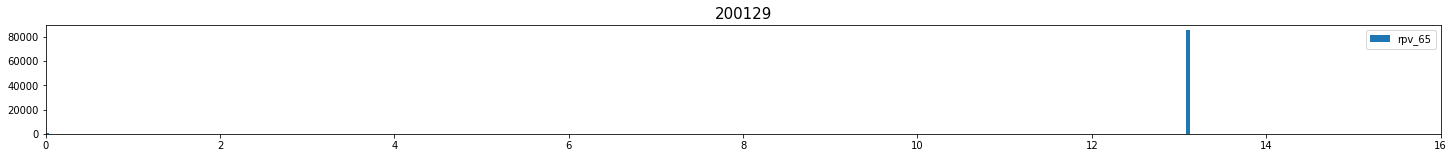

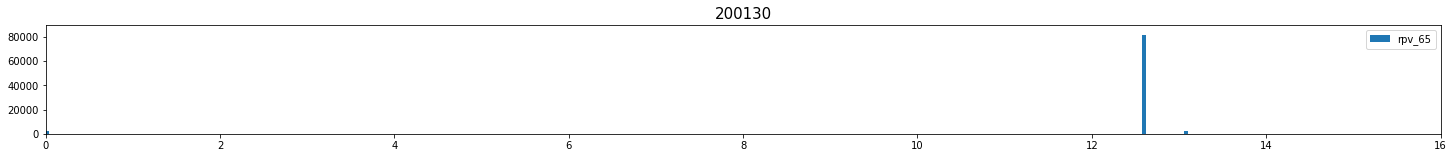

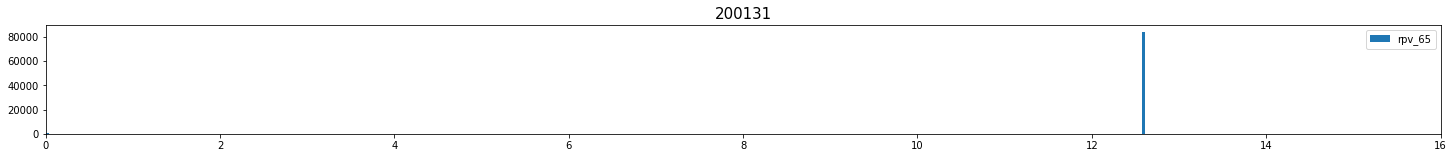

In [6]:
for i in range(len(DATE)):
    plt.figure(figsize = ([25,2]))
    plt.hist(DATE[i]['rpv_65'], bins = 300, label = 'rpv_65')
    plt.ylim(0,90000)
    plt.xlim(0,16)
    plt.title(SELECT_DATE[i], fontsize= 15)
    plt.legend()
plt.show();

## amp_65 ヒストグラム表示 

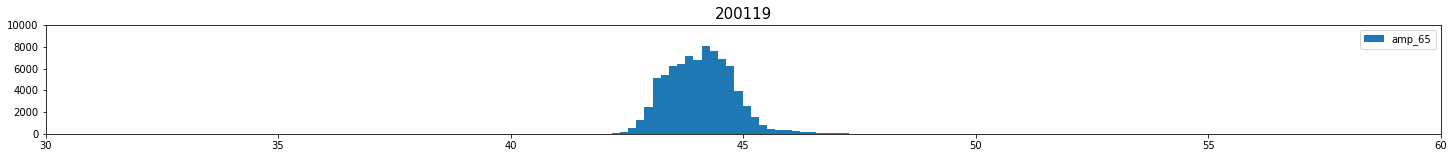

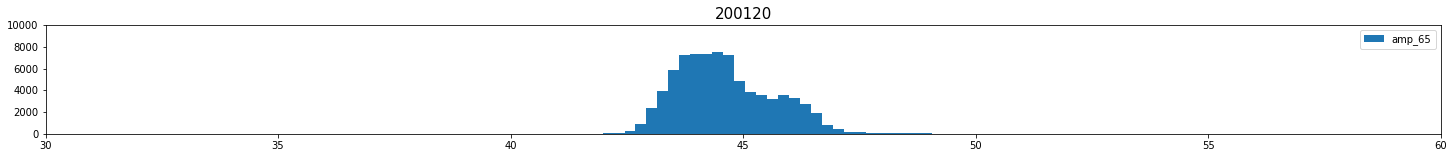

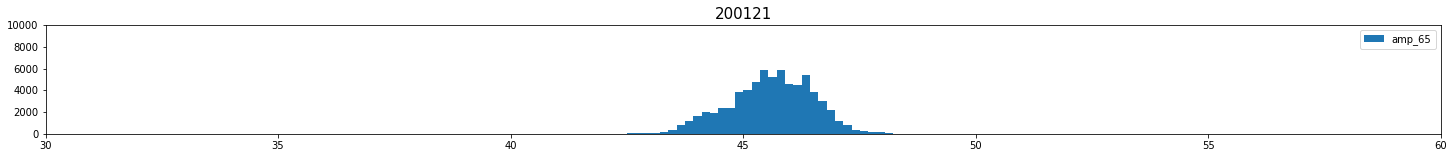

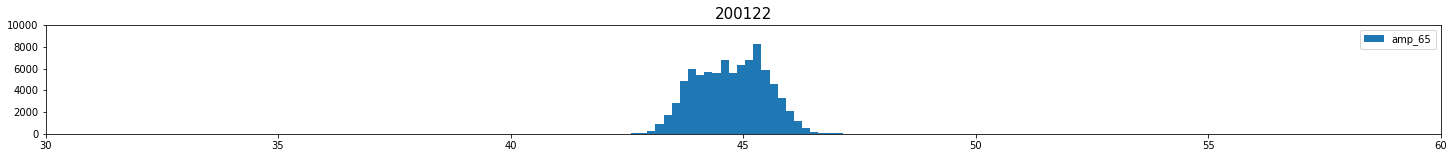

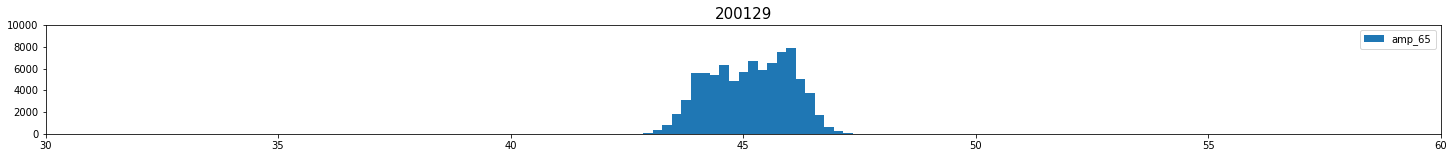

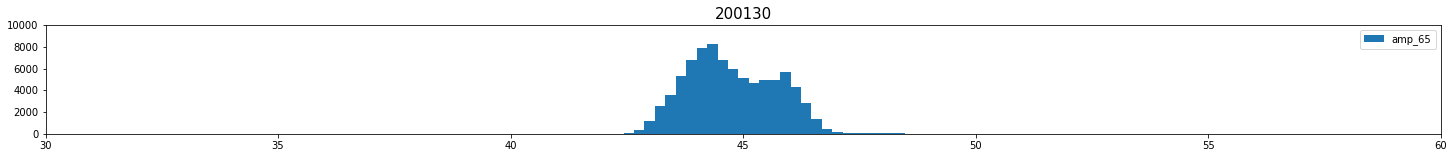

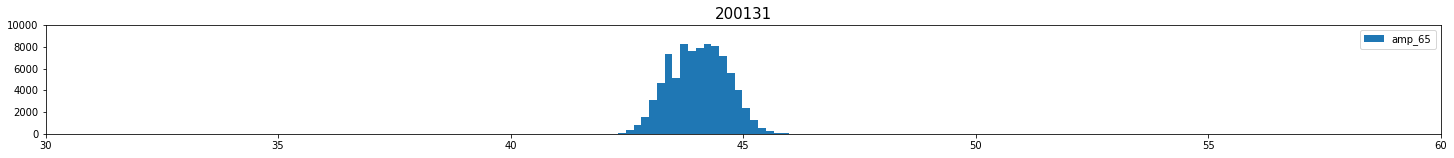

In [7]:
for i in range(len(DATE)):
    plt.figure(figsize = (25,2))
    plt.hist(DATE[i]['amp_65'], bins = 300, label = 'amp_65')
    plt.xlim(30,60)
    plt.ylim(0,10000)
    plt.title(SELECT_DATE[i], fontsize= 15)
    plt.legend()
plt.show();

## amp_65 ヒストグラム表示　1時間毎に分割してずらして表示 

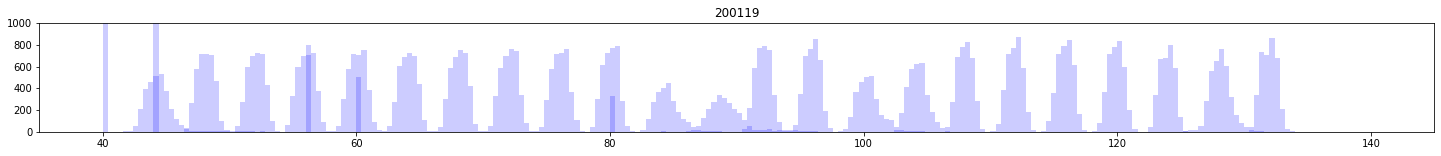

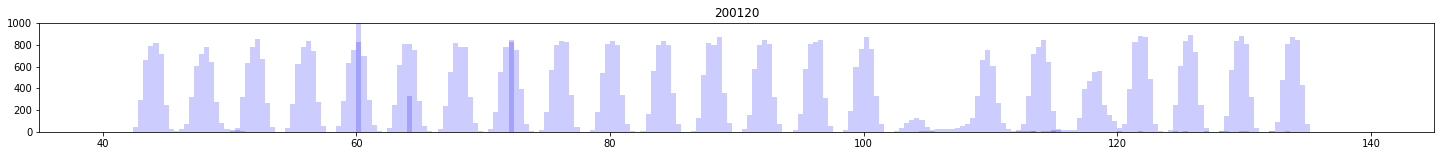

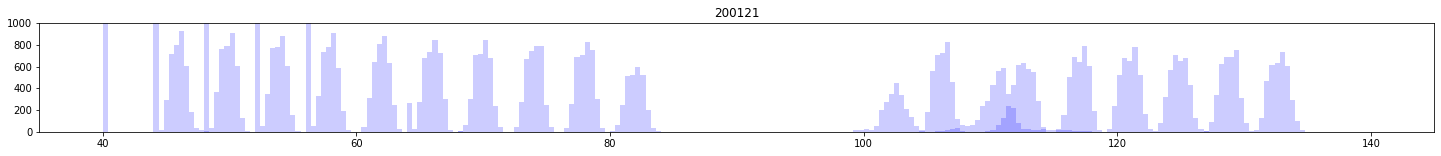

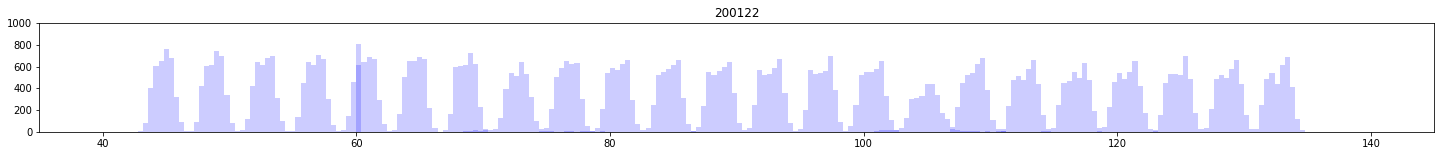

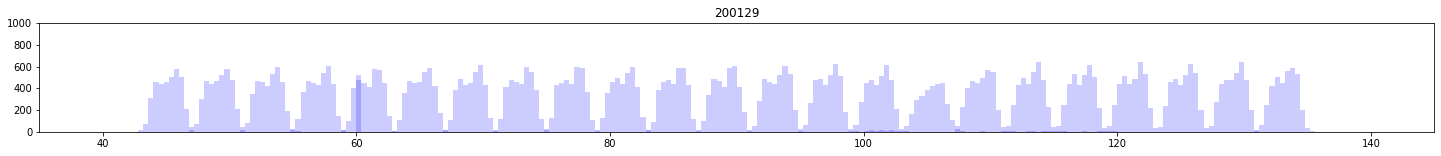

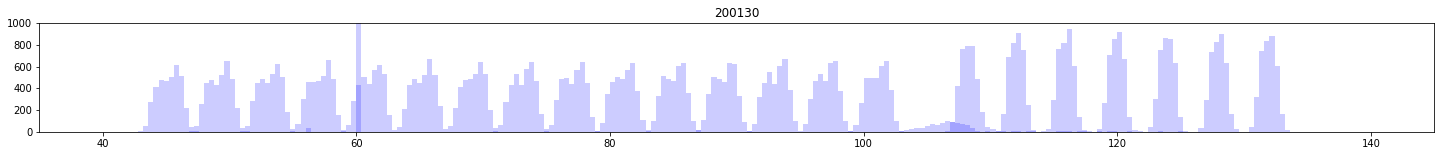

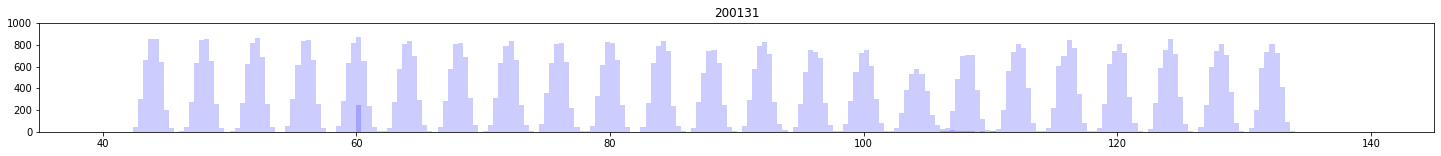

In [8]:
for i in range(len(DATE)):
    HOUR = {} #連番変数の設定
    turn = 1 # n時間区切り　n=1
    D = DATE[i].loc[0,'time']
    for j in range(0,23,turn):
        ST_COUNT = dt.datetime(D.year,D.month,D.day,j,0,0)
        if j+turn == 24:
            EN_COUNT = dt.datetime(D.yearD.month,D.day,23,59,59)
        else:
            EN_COUNT = dt.datetime(D.year,D.month,D.day,j + turn,0,0)
        HOUR[j] = DATE[i][(DATE[i]['time']>=ST_COUNT) & (DATE[i]['time']<EN_COUNT)]
    
    plt.figure(figsize = [25,2])
    for k in range(0,23,turn):
        plt.hist(HOUR[k]['amp_65']+4*k, bins = 250, color = 'b',alpha = 0.2, density = False, range = (40,140))
        plt.ylim(0,1000)
        plt.title(SELECT_DATE[i])
    plt.show()


1時間毎のヒストグラムを表示してみた。

1時間毎でも特徴的なパターンが確認できるように見える。

## 更にデータを絞り込んでみる。

- 200121
- 200122
- 200130

日付|製品|（DATA）|良品数|不良品数|製造中断時間|備考
-|-|-|-|-|-|-
200120|N|200121|200|58|1260min|切替え、生産開始21:00～不良多い
200121|N|200122|1480|178|50min|洗浄（16:00～16:50）
200129|N,C|200130|1260|233|200min|切替え（15:10～17:00）色抜き追加（18:00～19:40）


In [9]:
#使用ライブラリ
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import time
import numpy as np
from numpy.linalg import svd #, matrix_rank
from IPython.display import clear_output


#使用ディレクトリ
WORK_DIR = os.getcwd() #D:\yohta_share\gsds2019\project\remote
SAVE_DIR = WORK_DIR
DATA_DIR = 'D:\\yohta_share\\gsds2019\\project\\no7\\data_pickles'
CODE_DIR = 'D:\\yohta_share\\gsds2019\\project\\no7\\pycode'

In [10]:
SELECT_DATE2 = ['200121', '200122', '200130']

In [11]:
os.chdir(DATA_DIR)

DATE2 = {}
for i in range(len(SELECT_DATE2)):
    DATE2[i] = pd.read_pickle(SELECT_DATE2[i] + '_65.pkl')

### 時系列表示 

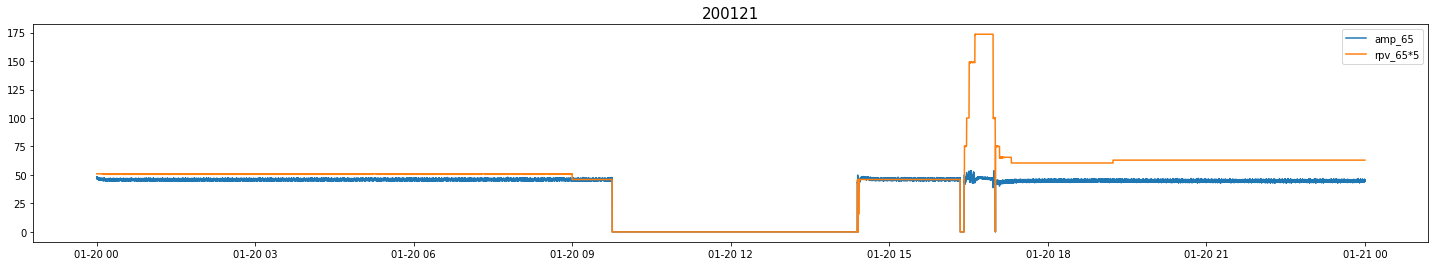

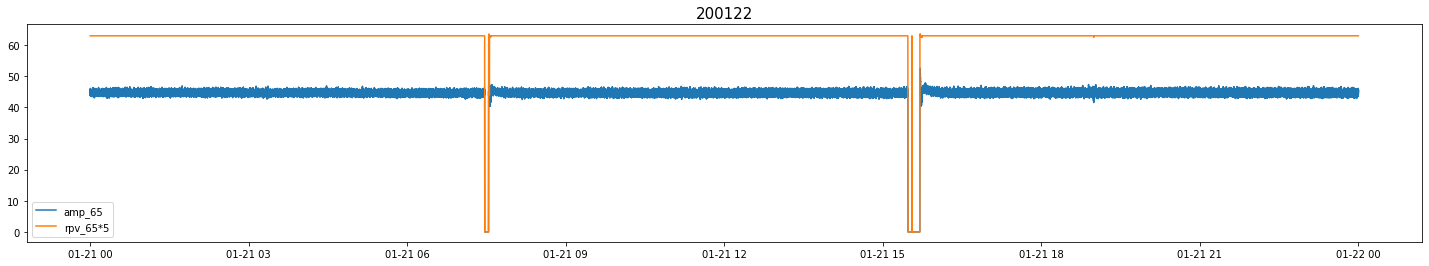

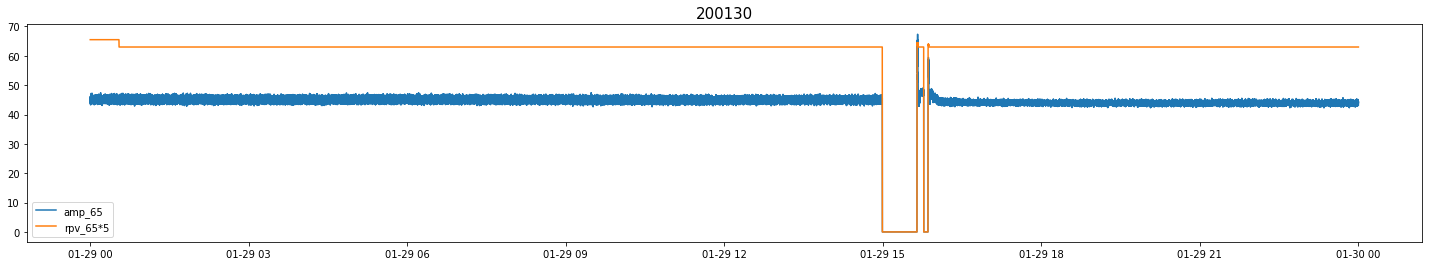

In [12]:
for i in range(len(DATE2)):
    plt.figure(figsize = ([25,4]))
    plt.plot(DATE2[i]['time'],DATE2[i]['amp_65'], label = 'amp_65')
    plt.plot(DATE2[i]['time'],DATE2[i]['rpv_65']*5, label = 'rpv_65*5')
    plt.title(SELECT_DATE2[i], fontsize= 15)
    plt.legend()
plt.show();

### amp_65 ヒストグラム表示　1時間毎に分割してずらして表示 

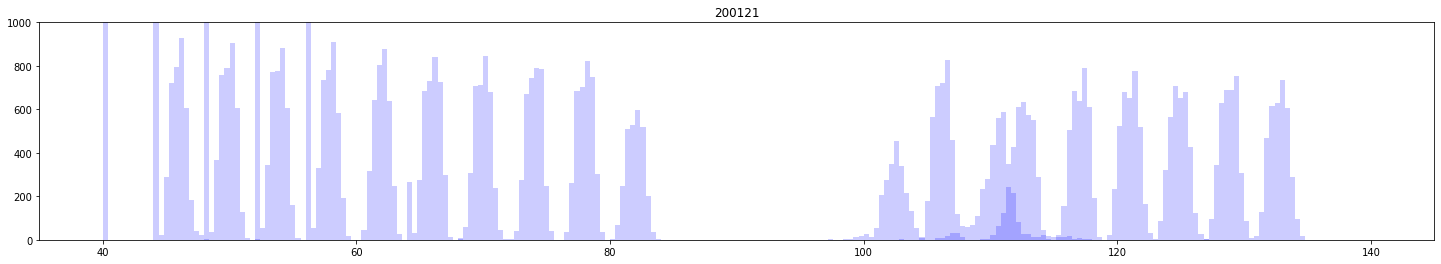

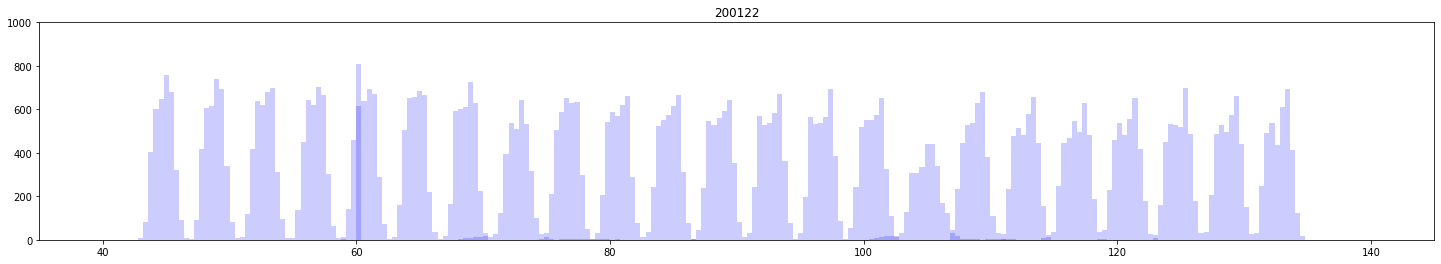

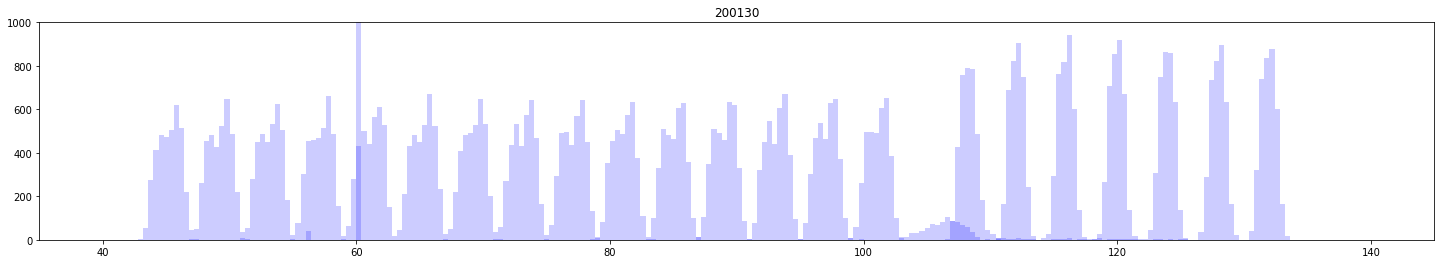

In [13]:
# import datetime as dt
for i in range(len(DATE2)):
    HOUR = {} #連番変数の設定
    turn = 1 # n時間区切り　n=1
    D = DATE2[i].loc[0,'time']
    for j in range(0,23,turn):
        ST_COUNT = dt.datetime(D.year,D.month,D.day,j,0,0)
        if j + turn == 24:
            EN_COUNT = dt.datetime(D.yearD.month,D.day,23,59,59)
        else:
            EN_COUNT = dt.datetime(D.year,D.month,D.day,j + turn,0,0)
        HOUR[j] = DATE2[i][(DATE2[i]['time']>=ST_COUNT) & (DATE2[i]['time']<EN_COUNT)]
    
    plt.figure(figsize = [25,4])
    for k in range(0,23,turn):
        plt.hist(HOUR[k]['amp_65']+4*k, bins = 250, color = 'b',alpha = 0.2, density = False, range = (40,140))
        plt.ylim(0,1000)
        plt.title(SELECT_DATE2[i])
    plt.show()


`200121`と`200122` は連結して扱う

In [15]:
DATE3={}
DATE3[0] = []
DATE3[0] = pd.concat([DATE2[0],DATE2[1]], axis = 0)
DATE3[1] = DATE2[2]
DATE3TITLE =["200121~200122","200130"]

C:\Users\yohta\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


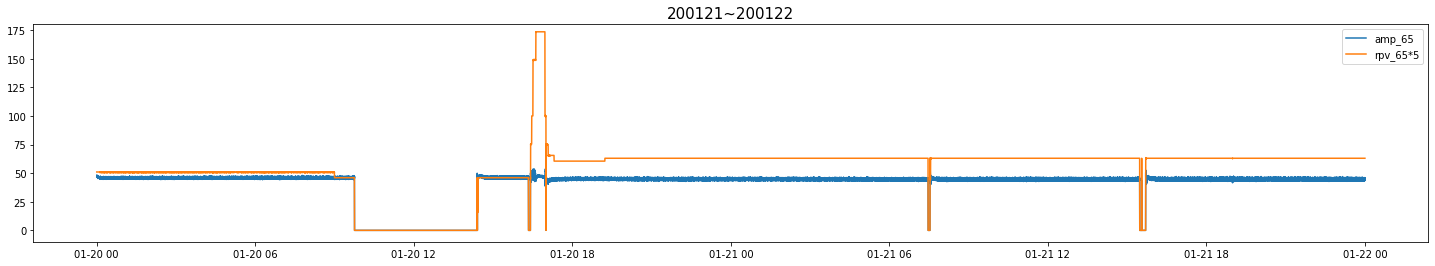

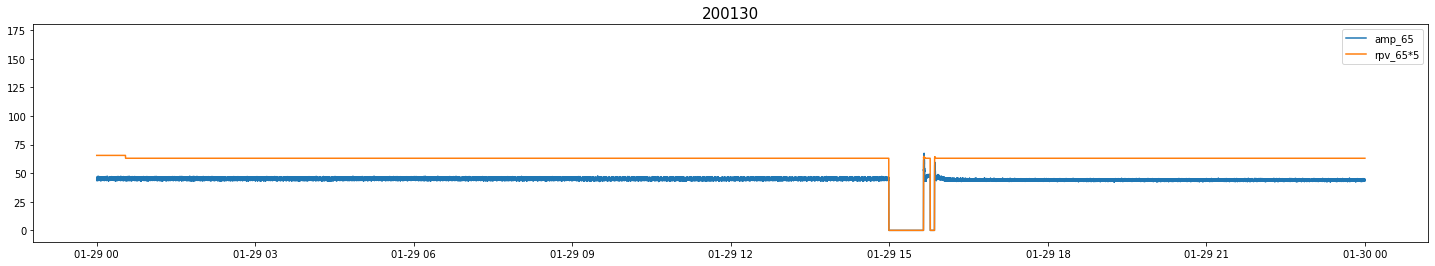

In [16]:
for i in range(len(DATE3)):
    plt.figure(figsize = ([25,4]))
    plt.plot(DATE3[i]['time'],DATE3[i]['amp_65'], label = 'amp_65')
    plt.plot(DATE3[i]['time'],DATE3[i]['rpv_65']*5, label = 'rpv_65*5')
    plt.ylim([-10,180])
    plt.title(DATE3TITLE[i], fontsize= 15)
    plt.legend()
plt.show();

欠損値無し

In [ ]:
print('len(DATE3[0])',len(DATE3[0]),'\nlen(DATE3[1])',len(DATE3[1]))

In [ ]:
DATE3[0][['time','amp_65','rpv_65']].isnull().sum()

In [ ]:
DATE3[1][['time','amp_65','rpv_65']].isnull().sum()

## 特異スペクトル変換法

### 特異スペクトル変換法のポイント

- 部分時系列（time-series subsequence）

    長さ *T*の時系列データに対して長さ *M*のスライド窓を動かして次々に生成する長さ *M*の時系列片
    
    
- 特異値分解（singular value decomposition, SVD）

    部分時系列行列**X**　を　特異ベクトル**U、V**と　特異値  **$\gamma$** に分解
    $$
    X = U\Gamma^{1/2} V^T
    $$
    
    特異値の数をXの階数よりも小さくとると近似式とみなされる
    


### 特異スペクトル変換法


<img src ="fig_tokui_spectre_transform.png">

<img src="TSS_formula.png">

### 特異スペクトル変換法

<img src="algo_tokui_spectre_transform.png">

<img src ="henkado_formula.png">


In [ ]:
# XIs  時系列の行列(部分時系列ベクトルの集合)（XIs）

# import time
t_start = time.time() # 計算時間の確認

##################################################################

# import numpy as np
# from numpy.linalg import svd, #matrix_rank

# パラメータ
M =3600 #slide window length(row)

# amp_65の時系列行列XIsを生成する

XIs = {} #DATE3の時系列行列の集合

for i in range(len(DATE3)):
    
    XI = {} #DATE3[i]の部分時系列
    
    for j in range(len(DATE3[i])-M):
        
        START = j
        END = START + M
        XI[j] = DATE3[i]['amp_65'].iloc[START:END].values
        
    XIs[i] = np.array(list(XI.values())) # 時系列行列
    print('\n{0} ({1}) is XIs[{2}] shape: {3}  M = {4}'.format(DATE3TITLE[i], len(DATE3[i]), i, XIs[i].shape, M))

##################################################################

t_end = time.time() 
t_cons = t_end - t_start
print('\ntime consumption: {} sec'.format(round(t_cons,2)))

時系列データ|データ点数|移動窓|部分時系列行列|履歴行列X|テスト行列
-|-|-|-|-|-
200121~200122|172800|3600|(169200,3600)|(3600,3600)|(3600,3600)
200130|86400|3600|(82800,3600)|(3600,3600)|(3600,3600)

In [ ]:
Xs = {}
Zs = {}

for j in range(len(DATE3)):
    T = len(DATE3[j])
    M = 3600
    N = 3600
    K = 3600
    L = 3600
    
    Tmin = M + N
    Tmax = T - K
    t = list(range(Tmin,Tmax))
    X = {}
    Z = {}
    for i,ts in enumerate(t):
        Xstart = ts - M - N 
        Xend = ts - M
        X[i] = XIs[j][Xstart:Xend,]
        
        Zstart = ts - M -K + L 
        Zend = ts - M + L
        Z[i] = XIs[j][Zstart:Zend,]
        print ('\nT{} : {} \nTmin : {} \nTmax : {} \nt: {} \nXstart : {} \nXend : {} \nZstart : {} \nZend : {}'.format(j, T, Tmin, Tmax, t[i], Xstart, Xend, Zstart, Zend))

    Xs[j]= X
    Zs[j]= Z


In [ ]:
print(len(Xs[0]))
print(type(Xs[0]))
print(type(Xs[0][0]))
print(Xs[0][0].shape)
print(Xs[0][0])

print(len(Xs[1]))
print(type(Xs[1]))
print(type(Xs[1][0]))
print(Xs[1][0].shape)
print(Xs[1][0])

In [ ]:
#
# import time
os.chdir(WORK_DIR)
from slack_notify import slack_notify
t_start = time.time() # 計算時間の確認
slack_notify()
# ##################################################################
#XsとZsの特異値分解（SVD）

# import numpy as np
# from numpy.linalg import svd #, matrix_rank
# from IPython.display import clear_output

uXs = {}
sXs = {}
vhXs = {}
qZs = {}
sZs = {}
vhZs = {}

for i in range(len(DATE3)):
    uX = {}
    sX = {}
    vhX = {}
    qZ = {}
    sZ = {}
    vhZ = {}
    
    for j in range(len(Xs[i])):
        
        uX[j],sX[j],vhX[j] = svd(Xs[i][j]) #XsのSVD
        
        qZ[j],sZ[j],vhZ[j] = svd(Zs[i][j]) #ZsのSVD
        
        tmid = time.time()
        
        clear_output()
        print('time consumption{}{}: {} sec'.format(i,  j, tmid - t_start))
    
    uXs[i] = uX
    sXs[i] = sX
    vhXs[i] = vhX
    qZs[i] = qZ
    sZs[i] = sZ
    vhZs[i] = vhZ
    
    t_slack = time.time()
    slack_notify( t_slack - t_start)

# ##################################################################
t_end = time.time()
t_cons = t_end - t_start
print('time consumption: {} sec'.format( t_cons))
slack_notify(t_cons)

In [ ]:
#スコアの計算
uXZ, sXZ, vhXZ = svd(uX.T @ qZ)

In [ ]:
np.amax(sXZ)

In [ ]:
#
# import time
# t_start = time.time() # 計算時間の確認

# ##################################################################

# ##################################################################
# t_end = time.time()
# t_cons = t_end - t_start
# print('time consumption: ', t_cons, ' sec')
